## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this case study, goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [1]:
# Load required libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA , IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc,precision_score,recall_score

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Read Data

In [2]:
data = pd.read_csv("train.csv")

print('Dataframe Shape: ', data.shape); print('-'*80, '\n');
print("Dataframe Info: \n"); data.info(verbose=True); print('-'*80, '\n')
data.head(5)

Dataframe Shape:  (69999, 172)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float6

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

Many fields having null values, lets analyze and impute/clean

### Data Analysis

### Identify columns with more unique values

In [4]:
data.dropna(how='all',inplace=True)

In [5]:
# Find columns with all same entries
data_unique_count_is_one=data.columns[data.nunique()==1]

In [6]:
data_unique_count_is_one

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

Single value fields, lets drop above columns

In [7]:
data.drop(data_unique_count_is_one,axis=1,inplace=True)

In [8]:
data.shape

(69999, 159)

### Check for Missing values

In [9]:
# Check how many rows have all missing values
print("Rows with all NULL values =",  data.isnull().all(axis=1).sum())

Rows with all NULL values = 0


In [10]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    missing = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [11]:
def imputeNan(data, imputeColList=False, missingColList=False):
    # Function impute the nan with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [12]:
# Missing values per column expressed as % of total number of values
high_missing_cols=getMissingValues(50)

There are 30 features having more than 50% missing values/entries


In [13]:
high_missing_cols.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [14]:
#data.drop(high_missing_cols.index,axis=1,inplace=True)

In [15]:
data.shape

(69999, 159)

In [16]:
# Dropping date fields

#date_vars = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]
date_vars=["date_of_last_rech_data_6", 'date_of_last_rech_data_7','date_of_last_rech_data_8',"date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]

data.drop(date_vars, axis=1, inplace=True)

In [17]:
data.columns[data.nunique()==2]

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'churn_probability'],
      dtype='object')

In [18]:
data.shape

(69999, 153)

In [19]:
# Id field not useful for analysis
data.drop("id", axis=1, inplace=True)

In [20]:
data.shape

(69999, 152)

In [21]:
missing_val_all=getMissingValues(0)

There are 108 features having more than 0% missing values/entries


In [22]:
len(missing_val_all.index[(missing_val_all<50)])

81

In [23]:
missing_cols_low=missing_val_all.index[(missing_val_all<50)]
missing_cols_low

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [24]:
missing_cols_high=missing_val_all.index[(missing_val_all>=50)]
missing_cols_high

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

## Data visulaization

In [25]:
# Dependent Variable: check data imbalance

churn = data["churn_probability"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

Total Churn Count     = 7132
Total Not-Churn Count = 62867
Churn Rate            = 10.19%


Text(0.5, 1.0, 'Churn status Distribution')

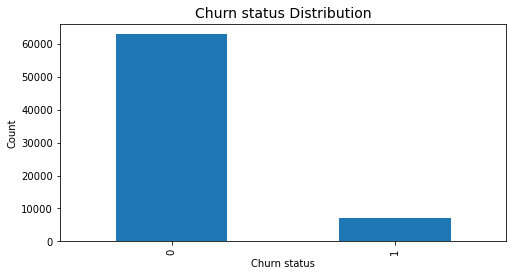

In [26]:
plt.figure(figsize=(8,4))
data["churn_probability"].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

OBSERVATION: Data is highly imbalanced, we need to balance it while creating the model

<AxesSubplot:xlabel='aon'>

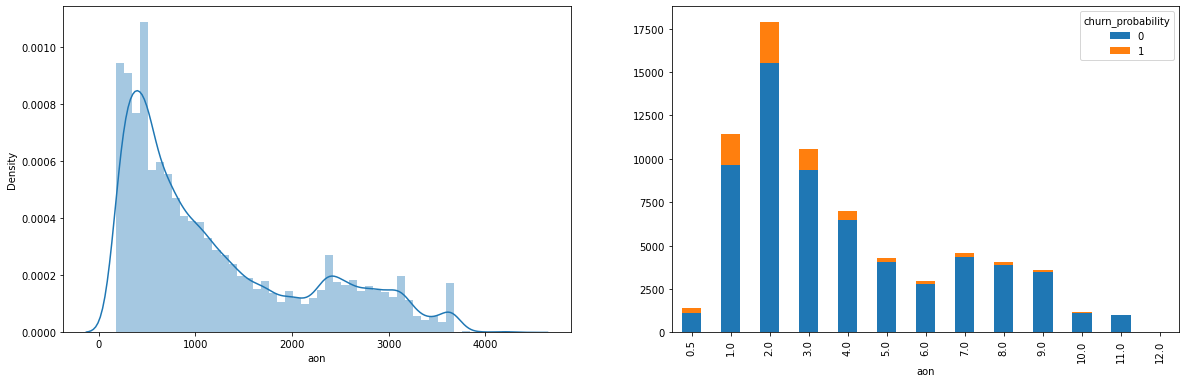

In [27]:
# Age on Network
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(data['aon'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pd.crosstab(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), data['churn_probability']).plot(kind='bar', stacked=True, ax = ax2)

- We could see more number of observations between 1 and 3 years
- Also churn rate is high during this range than the others

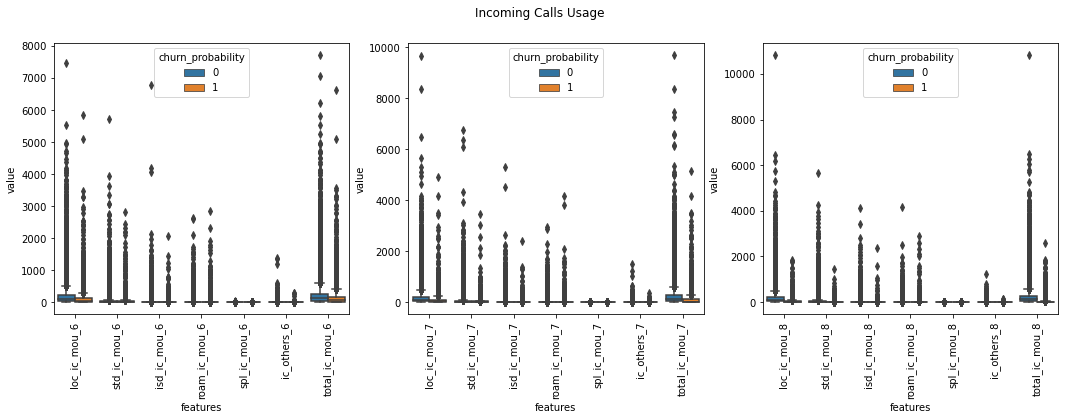

In [28]:
# Incoming calls usage

cols = [['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6'],
        ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7'],
        ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']]

# plot for the incoming calls usage
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Incoming Calls Usage')

Almost all the Incoming calls usage columns seem to have outliers at the top percentile

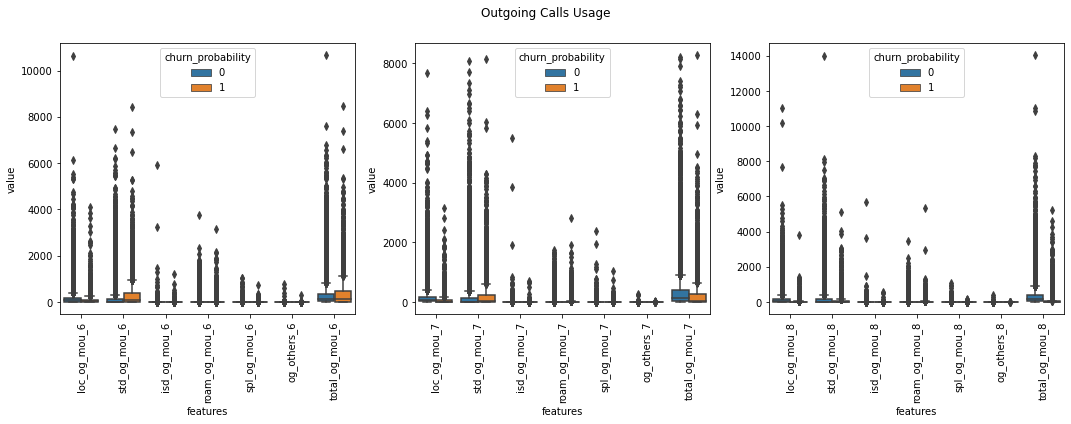

In [29]:
# Outgoing calls usage

cols = [['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6'],
        ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7'],
        ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']]

# plot for the outgoing calls usage
plt.figure(figsize=(18, 5))
#ic call usage
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Outgoing Calls Usage')

Outgoing calls usage columns also seem to have outliers at the top percentile

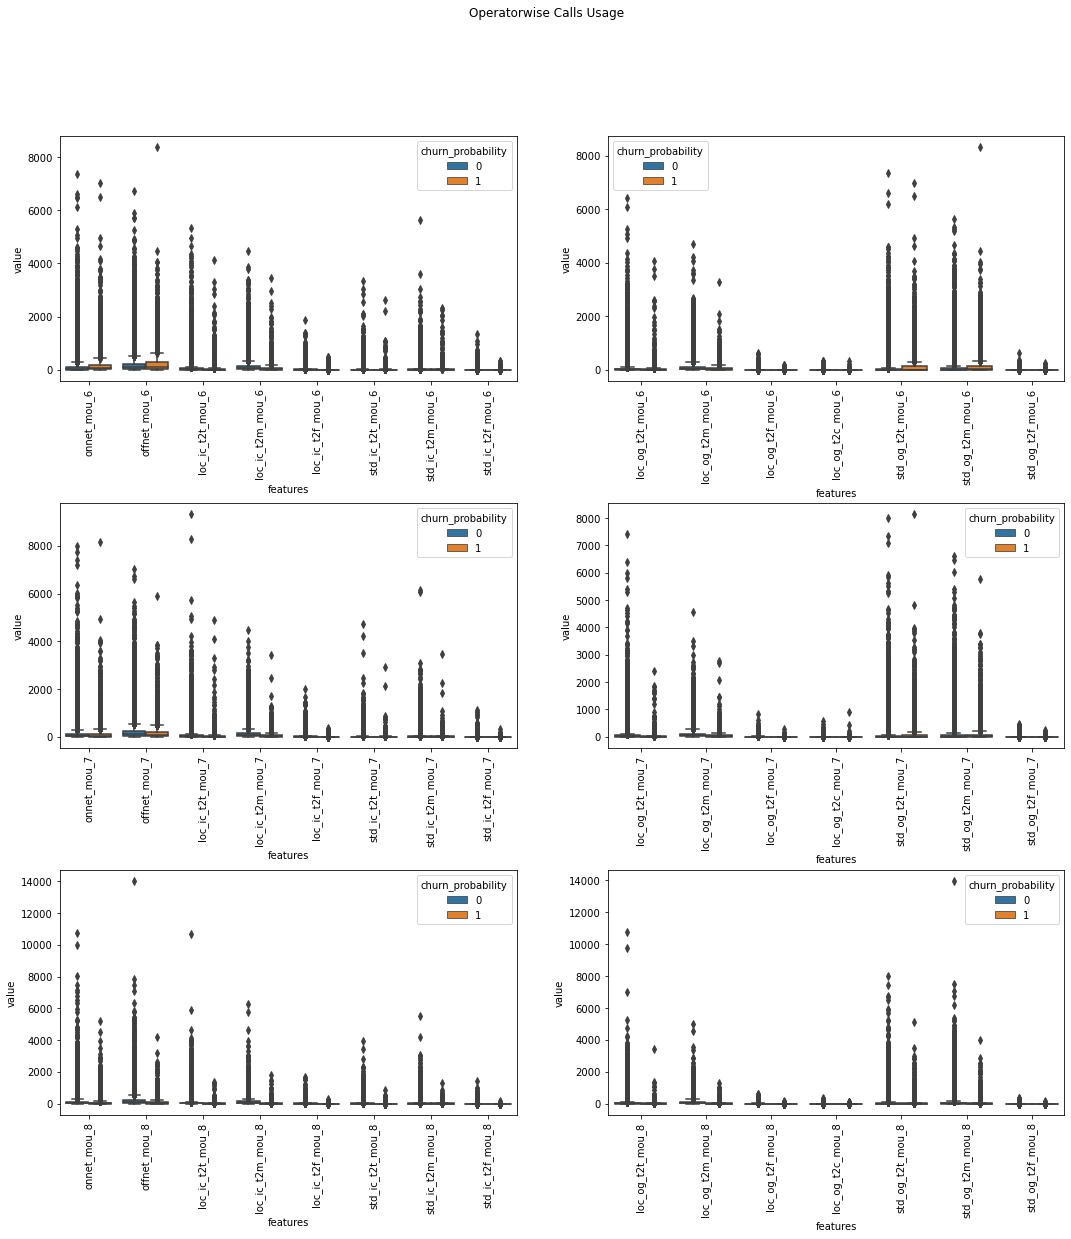

In [30]:
# Operator wise usage

cols = [['onnet_mou_6','offnet_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'],
        ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6'],
        ['onnet_mou_7','offnet_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],
        ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7'],
        ['onnet_mou_8','offnet_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],
        ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8']]

# plot for the operatorwise calls usage
plt.figure(figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)
for i in range(0,6):
    plt.subplot(3,2,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Operatorwise Calls Usage')

Operatorwise calls usage columns also seem to have outliers at the top percentile

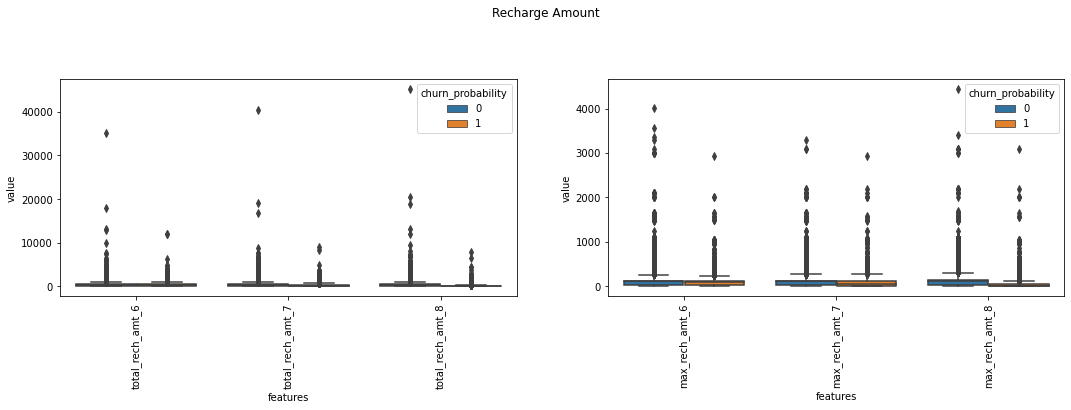

In [31]:
# Recharge amount
cols = [
        ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],
        ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
       ]

# plot for the recharge amount columns
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(0,2):
    plt.subplot(2,2,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Recharge Amount')

Recharge amount columns also seem to have outliers at the top percentile

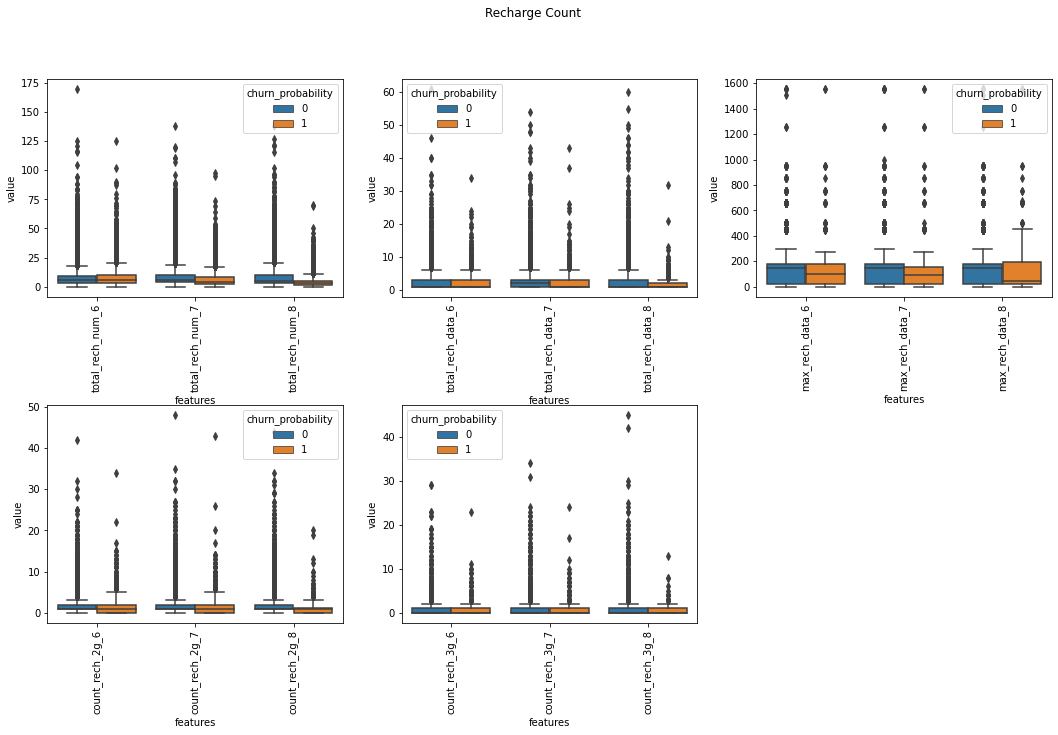

In [32]:
# Recharge count

cols = [
        ['total_rech_num_6','total_rech_num_7','total_rech_num_8'],
        ['total_rech_data_6','total_rech_data_7','total_rech_data_8'],
        ['max_rech_data_6','max_rech_data_7','max_rech_data_8'],
        ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'],
        ['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'] 
       ]

# plot for the recharge count columns
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(0,5):
    plt.subplot(2,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Recharge Count')

Recharge count columns also seem to have outliers at the top percentile

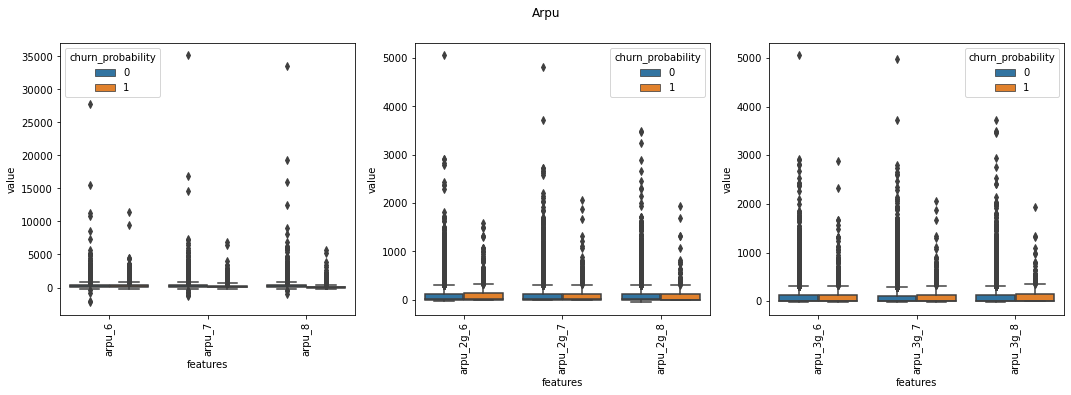

In [33]:
# Average Revenue per User (Arpu)
cols = [
        ['arpu_6','arpu_7','arpu_8'],
        ['arpu_2g_6','arpu_2g_7','arpu_2g_8'],
        ['arpu_3g_6','arpu_3g_7','arpu_3g_8']
       ]

# plot for the arpu
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Arpu')

arpu columns also seem to have outliers at the top percentile

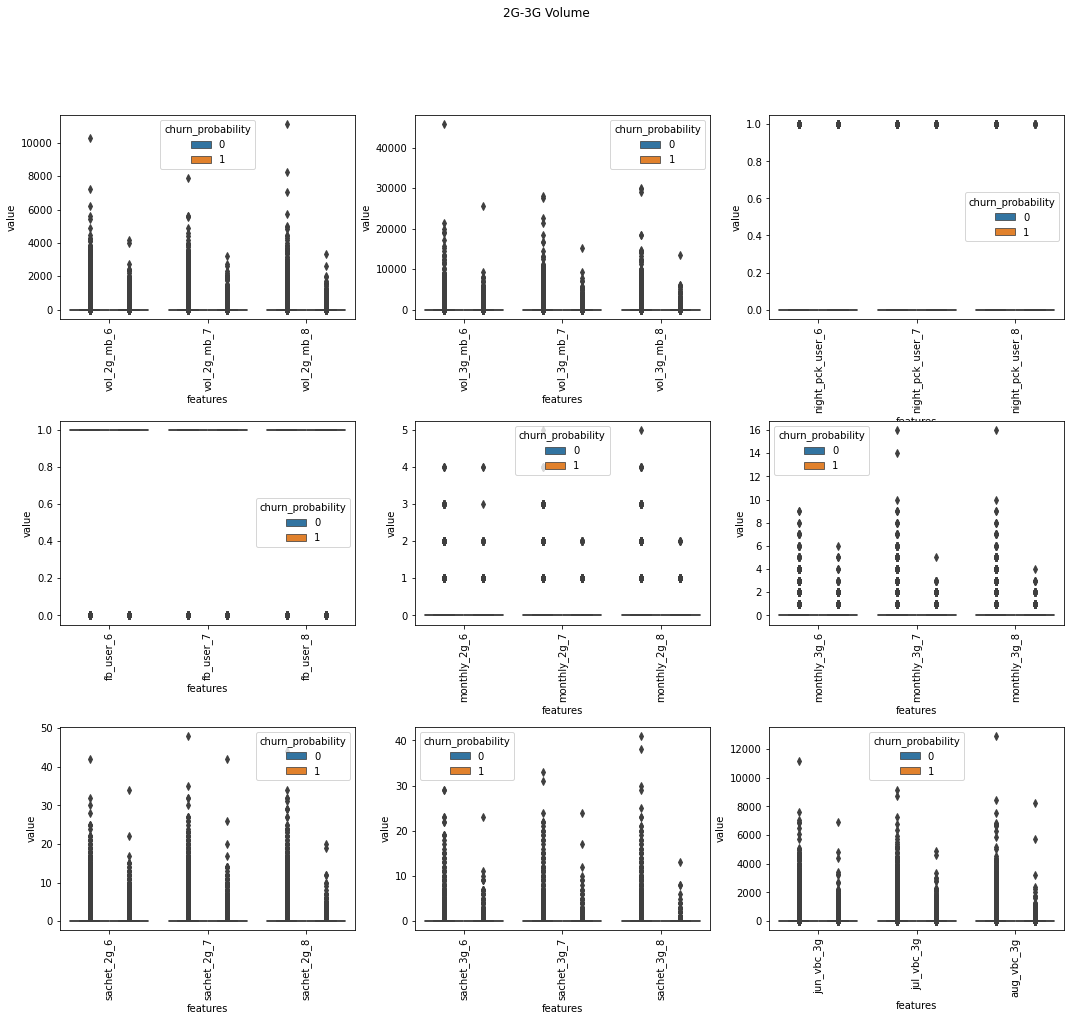

In [34]:
# 2G and 3G

cols = [
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['night_pck_user_6','night_pck_user_7','night_pck_user_8'],
        ['fb_user_6','fb_user_7','fb_user_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']
       ]

# plot for the 2g-3g volume
plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5)
for i in range(0,9):
    plt.subplot(3,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('2G-3G Volume')

2G and 3G volume columns also seem to have outliers at the top percentile

<AxesSubplot:>

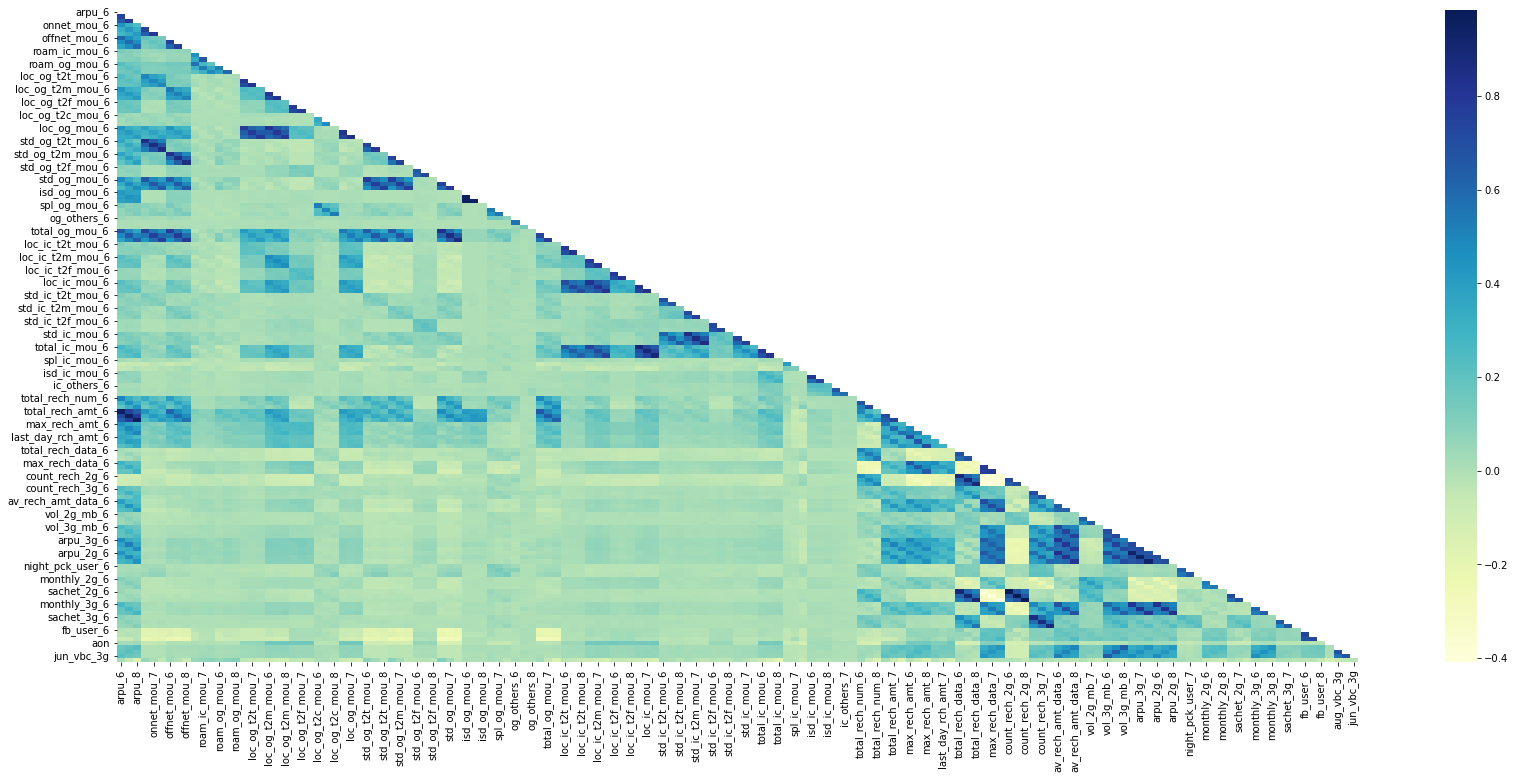

In [35]:
import seaborn as sns

plt.figure(figsize=(28,12))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=False,mask=np.triu(data.corr()))

We can see there are columns which are highly correlated

### From business analysis month 6 and 7 are good phase, Where as month month 8th in churn phase .Lets' verify this

In [36]:
avg_good_phase=(data.total_rech_amt_6+data.total_rech_amt_7)/2

In [37]:
less_recharge=data[data.total_rech_amt_8 < avg_good_phase]

In [38]:
(less_recharge.churn_probability==1).sum()/(less_recharge.churn_probability==0).sum()

0.19161233953894752

In [39]:
more_recharge=data[data.total_rech_amt_8 >= avg_good_phase]

In [40]:
(more_recharge.churn_probability==1).sum()/(more_recharge.churn_probability==0).sum()

0.04319067323084358

### it can be seen that those customer who has recharge more amount in month 8th in comparision with average of month 6 and 7th, they are less likely to churn
These are high value customers. Lets doo feature engineering for such customers

In [41]:
data["high_value_customer_diff"]=data.total_rech_amt_8 - ((data.total_rech_amt_6 +data.total_rech_amt_7)/2)

## Modelling Start

In [42]:
X = data[data.columns[~data.columns.isin(['churn_probability'])]]
Y = data['churn_probability']
numeric_cols=X.columns[X.nunique()!=2]


In [43]:
## Check and impute data
zero_impute=1

orig_cols=X.columns
if zero_impute==0:
    orig_cols=X.columns    
    simple_imtr = SimpleImputer(strategy='median')
    #simple_imtr = KNNImputer(n_neighbors=5)
    X = pd.DataFrame(simple_imtr.fit_transform(X))
    X.columns=orig_cols
else :
    X=X.fillna(0)

In [44]:
orig_columns=X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std= pd.DataFrame(X_std)
X_std.columns=orig_columns
X_std.shape

(69999, 152)

In [45]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.7,test_size=0.3,random_state=42)

In [46]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'high_value_customer_diff'],
      dtype='object', length=152)

In [47]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (48999, 152)
Training dataset target size (48999,)
Test dataset size (21000, 152)
Test dataset target size (21000,)


In [48]:
print("Data imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Data imbalance, counts of label '0': {} \n".format(sum(y_train==0)))

Data imbalance, counts of label '1': 4977
Data imbalance, counts of label '0': 44022 



## Imbalance dataset - lets use Class weights while fitting

In [49]:
X_train.shape

(48999, 152)

In [50]:
count_class_1 = y_train.value_counts()[0]
count_class_2 = y_train.value_counts()[1]
ratio = count_class_1/count_class_2


print("Counts of label '1': {}".format(sum(y_train==1)))
print("Counts of label '0': {}".format(sum(y_train==0)))
print(ratio)

Counts of label '1': 4977
Counts of label '0': 44022
8.845087402049428


## PCA Start

In [51]:
# PCA object with default parameter
pca = PCA(random_state=42)

In [52]:
#Doing PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [53]:
print(pca.components_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_.cumsum())

[[ 1.44607222e-01  1.49162047e-01  1.42801718e-01 ...  1.12413013e-01
   1.08356975e-01 -1.85352049e-03]
 [-9.31748003e-02 -9.78714384e-02 -9.12271394e-02 ...  8.88295933e-02
   8.69249614e-02  6.89963501e-03]
 [-4.95031760e-02 -6.42210880e-02 -5.55210391e-02 ...  4.62592685e-03
   5.37328083e-03  4.09597928e-03]
 ...
 [ 0.00000000e+00  3.33889726e-16  8.83876774e-17 ... -4.22751454e-17
  -8.21901928e-17 -1.29041683e-02]
 [ 0.00000000e+00 -4.80704935e-16  1.27636248e-15 ... -8.51732436e-17
   1.31893758e-16 -5.19783188e-02]
 [ 0.00000000e+00  3.58507546e-16 -4.30043158e-16 ... -9.60650218e-18
   1.63359548e-17 -5.51817304e-02]]
-------------------------------------------------------------------------------- 

[1.24284201e-01 9.30398518e-02 6.28499036e-02 4.98162227e-02
 3.70318258e-02 2.97747889e-02 2.69354311e-02 2.48293770e-02
 2.43766251e-02 2.18958142e-02 2.07974957e-02 2.02128409e-02
 1.96297357e-02 1.70888388e-02 1.65817860e-02 1.59796153e-02
 1.48054148e-02 1.45691641e-02 1.4245

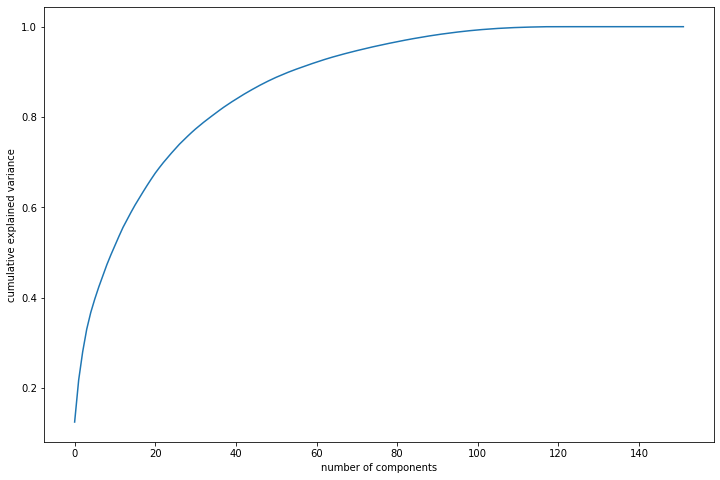

In [54]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [55]:
#pick the number of components explaining max variance
pca_X= IncrementalPCA(n_components=60)

df_train_pca_X = pca_X.fit_transform(X_train)
print(df_train_pca_X.shape)
df_test_pca_X = pca_X.transform(X_test)
print(df_test_pca_X.shape)

(48999, 60)
(21000, 60)


## Logistic Regression with PCA data

In [56]:
#Run the model using the selected variables
LR = LogisticRegression(class_weight='balanced')
LR.fit(df_train_pca_X, y_train)

LogisticRegression(class_weight='balanced')

In [57]:
#Predicted probabilities
y_pred_train = LR.predict(df_train_pca_X)

#Printing results
print("Train data results")
print('-'*80, '\n');
print("Accuracy Score:",accuracy_score(y_train,y_pred_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_pred_train))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_train, y_pred_train)))
y_pred_train_prob = LR.predict_proba(df_train_pca_X)
lr_train_acc=accuracy_score(y_train,y_pred_train)

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7818526908712423
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     44022
           1       0.30      0.85      0.44      4977

    accuracy                           0.78     48999
   macro avg       0.64      0.81      0.65     48999
weighted avg       0.91      0.78      0.82     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[34084  9938]
 [  751  4226]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.81


In [58]:
#Predicted probabilities
y_pred_test = LR.predict(df_test_pca_X)

#Printing results
print("Test data results");
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_test,y_pred_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_test))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, y_pred_test)))
y_pred_test_prob = LR.predict_proba(df_test_pca_X)
lr_test_acc=accuracy_score(y_test,y_pred_test)

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7829047619047619
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     18845
           1       0.30      0.87      0.45      2155

    accuracy                           0.78     21000
   macro avg       0.64      0.82      0.66     21000
weighted avg       0.91      0.78      0.82     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[14566  4279]
 [  280  1875]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.82


## Trying Random Forest with original data, not PCA Data

In [59]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier( random_state=42,n_jobs=-1,
                             class_weight='balanced_subsample',                             
                            )

#fit
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=42)

In [60]:
predictions_train = rfc.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train, predictions_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, predictions_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 1.0
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00      4977

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[44022     0]
 [    0  4977]]


In [61]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))
lr_precission=precision_score(y_test, predictions_test)
lr_recall=recall_score(y_test, predictions_test)

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9407142857142857
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18845
           1       0.79      0.58      0.67      2155

    accuracy                           0.94     21000
   macro avg       0.87      0.78      0.82     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18508   337]
 [  908  1247]]


### Random forest hyper parameter tuning

In [62]:
params = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [1,2,5,10],
    'min_samples_split': [2,5,10]
}

strat_cv = StratifiedKFold( n_splits=4, shuffle=True, random_state=42 )

grid_search_rfc = GridSearchCV(
                    estimator = RandomForestClassifier(class_weight='balanced_subsample', random_state=42),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = strat_cv,
                    n_jobs=-1, verbose=3
                    )
grid_search_rfc.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=3)

In [63]:
print(grid_search_rfc.best_estimator_)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       min_samples_leaf=2, random_state=42)


In [64]:
grid_search_rfc.best_score_

0.9422029636738359

In [65]:
grid_search_rfc.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [66]:
rfc_best = RandomForestClassifier( random_state=42,n_jobs=-1 ,
                                  max_depth=30 ,
                                  min_samples_leaf=2,
                                  min_samples_split=2,
                                  class_weight='balanced_subsample'                           
                           )
rfc_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       min_samples_leaf=2, n_jobs=-1, random_state=42)

In [67]:
predictions_rfc_train = rfc_best.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train, predictions_rfc_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, predictions_rfc_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train, predictions_rfc_train))
predictions_rfc_train_prob = rfc_best.predict_proba(X_train)
rfc_train_acc=accuracy_score(y_train, predictions_rfc_train)

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9897548929569991
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     44022
           1       0.91      1.00      0.95      4977

    accuracy                           0.99     48999
   macro avg       0.95      0.99      0.97     48999
weighted avg       0.99      0.99      0.99     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[43522   500]
 [    2  4975]]


In [68]:
print ("Test data results")
print('-'*80, '\n');
predictions_rfc_test = rfc_best.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_rfc_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_rfc_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_rfc_test))
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, predictions_rfc_test)))
predictions_rfc_test_prob = rfc_best.predict_proba(X_test)
rfc_test_acc=accuracy_score(y_test, predictions_rfc_test)
rfc_precission=precision_score(y_test, predictions_rfc_test)
rfc_recall=recall_score(y_test, predictions_rfc_test)

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9418095238095238
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.76      0.63      0.69      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.80      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18423   422]
 [  800  1355]]
roc_auc_score: 0.8


In [69]:
importances = rfc_best.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,0.077242,loc_ic_mou_8
1,0.068008,loc_ic_t2m_mou_8
2,0.045745,loc_og_t2m_mou_8
3,0.043874,total_ic_mou_8
4,0.038485,loc_og_mou_8
5,0.038249,total_og_mou_8
6,0.038244,last_day_rch_amt_8
7,0.034182,loc_ic_t2t_mou_8
8,0.024682,arpu_8
9,0.024162,roam_og_mou_8


## Adaboost Classifier

In [70]:
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [71]:
predictions_ada_train = ada.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train, predictions_ada_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, predictions_ada_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train, predictions_ada_train))
ada_train_acc=accuracy_score(y_train, predictions_ada_train)

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9394885609910406
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     44022
           1       0.75      0.61      0.67      4977

    accuracy                           0.94     48999
   macro avg       0.85      0.79      0.82     48999
weighted avg       0.94      0.94      0.94     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[43014  1008]
 [ 1957  3020]]


In [72]:
print ("Test data results")
print('-'*80, '\n');
predictions_ada_test = ada.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_ada_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_ada_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_ada_test))
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, predictions_ada_test)))
ada_test_acc=accuracy_score(y_test, predictions_ada_test)
ada_precission=precision_score(y_test, predictions_ada_test)
ada_recall=recall_score(y_test, predictions_ada_test)

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9391904761904762
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.75      0.61      0.67      2155

    accuracy                           0.94     21000
   macro avg       0.85      0.80      0.82     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18400   445]
 [  832  1323]]
roc_auc_score: 0.8


## GBM Boost

In [73]:
params = {
    'max_depth': [5,10,15,20,25,30],
   'n_estimators':[10,15,20,25,30]
}

gbmc =  LGBMClassifier(random_state=42)
grid_search_gbm = GridSearchCV(estimator=gbmc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")
grid_search_gbm.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [10, 15, 20, 25, 30]},
             scoring='accuracy', verbose=3)

In [74]:
grid_search_gbm.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [75]:
gbm=LGBMClassifier(random_state=42,max_depth=10,n_estimators=30)
gbm.fit(X_train, y_train)

LGBMClassifier(max_depth=10, n_estimators=30, random_state=42)

In [76]:
predictions_gbm_train = gbm.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train, predictions_gbm_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, predictions_gbm_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train, predictions_gbm_train))
gbm_train_acc=accuracy_score(y_train, predictions_gbm_train)

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9466111553297006
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     44022
           1       0.78      0.66      0.71      4977

    accuracy                           0.95     48999
   macro avg       0.87      0.82      0.84     48999
weighted avg       0.94      0.95      0.94     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[43110   912]
 [ 1704  3273]]


In [77]:
print ("Test data results")
print('-'*80, '\n');
predictions_gbm_test = gbm.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_gbm_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_gbm_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_gbm_test))
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, predictions_gbm_test)))
gbm_test_acc=accuracy_score(y_test, predictions_gbm_test)
gbm_precission=precision_score(y_test, predictions_gbm_test)
gbm_recall=recall_score(y_test, predictions_gbm_test)

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9427619047619048
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.76      0.65      0.70      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18403   442]
 [  760  1395]]
roc_auc_score: 0.81


In [78]:
importances = gbm.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,52,last_day_rch_amt_8
1,50,loc_ic_mou_8
2,41,high_value_customer_diff
3,39,roam_og_mou_8
4,36,aon
5,33,total_ic_mou_8
6,33,spl_ic_mou_8
7,29,loc_ic_mou_7
8,26,total_rech_num_7
9,21,total_rech_num_8


## Trying with XG Boost

In [79]:


#Running the XGBClassifier with default parameters.
xgb = XGBClassifier(random_state=42)

#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
predictions_train = xgb.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train, predictions_train))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train, predictions_train))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train, predictions_train))


Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9773668850384701
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     44022
           1       0.91      0.86      0.89      4977

    accuracy                           0.98     48999
   macro avg       0.95      0.93      0.94     48999
weighted avg       0.98      0.98      0.98     48999

-------------------------------------------------------------------------------- 

confusion matrix:
[[43591   431]
 [  678  4299]]


In [81]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = xgb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9411428571428572
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.75      0.64      0.69      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[18388   457]
 [  779  1376]]


In [82]:
params = {
    'max_depth': [3,4,5],
   'n_estimators':[50,100,150]
}

xgbc =  XGBClassifier(random_state=42,scale_pos_weight=1)
grid_search_xgb = GridSearchCV(estimator=xgbc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")
grid_search_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [83]:
grid_search_xgb.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [84]:
#Running the XGB Classifier with hyper parameters.
xgb_best = XGBClassifier(random_state=42,max_depth = 3,n_estimators=50,n_jobs=-1)

#fit
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [85]:
predictions_train_xgb = xgb_best.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train, predictions_train_xgb))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train, predictions_train_xgb))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train, predictions_train_xgb))
predictions_train_xgb_prob=xgb_best.predict_proba(X_train)
xgb_train_acc=accuracy_score(y_train, predictions_train_xgb)

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9447131574113757
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     44022
           1       0.77      0.65      0.70      4977

    accuracy                           0.94     48999
   macro avg       0.87      0.81      0.84     48999
weighted avg       0.94      0.94      0.94     48999

-------------------------------------------------------------------------------- 

confusion matrix:
[[43070   952]
 [ 1757  3220]]


In [86]:
predictions_test_xgb = xgb_best.predict(X_test)
print ("Test data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_test, predictions_test_xgb))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test_xgb))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test_xgb))
predictions_train_xgb_prob=xgb_best.predict_proba(X_test)
xgb_test_acc=accuracy_score(y_test, predictions_test_xgb)
xgb_precission=precision_score(y_test, predictions_test_xgb)
xgb_recall=recall_score(y_test, predictions_test_xgb)

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9427619047619048
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.76      0.65      0.70      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[18401   444]
 [  758  1397]]


In [87]:
importances = xgb_best.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,0.332478,total_ic_mou_8
1,0.107268,loc_ic_mou_8
2,0.068803,fb_user_8
3,0.020359,roam_og_mou_8
4,0.018482,last_day_rch_amt_8
5,0.017436,offnet_mou_8
6,0.016924,av_rech_amt_data_8
7,0.014366,arpu_8
8,0.014230,std_og_mou_7
9,0.012538,total_og_mou_8


In [88]:
results = {'Algorithm':['LR With PCA', 'Random Forest', 'Adaboost', 'LightGBM','XGBoost'],
        'Train Accuracy':[lr_train_acc, rfc_train_acc, ada_train_acc, gbm_train_acc,xgb_train_acc],
        'Test Accuracy':[lr_test_acc, rfc_test_acc, ada_test_acc, gbm_test_acc,xgb_test_acc],
        'Precission':[lr_precission, rfc_precission, ada_precission, gbm_precission,xgb_precission],
        'Recall':[lr_recall, rfc_recall, ada_recall, gbm_recall,xgb_recall],
       }
  
results_df = pd.DataFrame(results)
results_df.set_index('Algorithm')

,Train Accuracy,Test Accuracy,Precission,Recall
Algorithm,,,,
LR With PCA,0.781853,0.782905,0.787247,0.578654
Random Forest,0.989755,0.941810,0.762521,0.628770
Adaboost,0.939489,0.939190,0.748303,0.613921
LightGBM,0.946611,0.942762,0.759390,0.647332
XGBoost,0.944713,0.942762,0.758827,0.648260


#### LR  has very low recall and overall accuracy
#### LightGBM and XGBoost showing best test accuracy 
#### Random forest train and test accuracy diffrence is large in comparision with LightGBM and XGBoost classifier. Also recall is less
## So Either LightGBM or XGBoost can be chosen as final model. Lets see the accuracy on Kaggle dataset

### Evaluating Kaggle Test Data

In [89]:
X_test.shape

(21000, 152)

In [90]:
test_data = pd.read_csv("test.csv")

print('Dataframe Shape: ', test_data.shape); print('-'*80, '\n');
test_data.head(5)

Dataframe Shape:  (30000, 171)
-------------------------------------------------------------------------------- 



,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [91]:

test_data.drop(data_unique_count_is_one, axis=1, inplace=True)

test_data.shape

(30000, 158)

In [92]:

#test_data.drop(high_missing_cols.index, axis=1, inplace=True)
#test_data.shape

In [93]:
test_data.drop(date_vars, axis=1, inplace=True)
test_data.shape

(30000, 152)

In [94]:
id=test_data.id

In [95]:
test_data.drop("id", axis=1, inplace=True)
test_data.shape

(30000, 151)

In [96]:
test_data["high_value_customer_diff"]=test_data.total_rech_amt_8 - ((test_data.total_rech_amt_6 +test_data.total_rech_amt_7)/2)

In [97]:
missing_values = pd.DataFrame((test_data.isnull().sum()/len(test_data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values.head(10)

,feature,Missing%
123,arpu_3g_6,74.716667
129,night_pck_user_6,74.716667
102,total_rech_data_6,74.716667
108,count_rech_2g_6,74.716667
111,count_rech_3g_6,74.716667
144,fb_user_6,74.716667
114,av_rech_amt_data_6,74.716667
126,arpu_2g_6,74.716667
105,max_rech_data_6,74.716667
130,night_pck_user_7,74.313333


In [98]:
test_data.shape

(30000, 152)

In [99]:
test_data.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,high_value_customer_diff
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,-36.5
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00,0.0
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.

In [100]:
if zero_impute==0:
    orig_cols=test_data.columns
    test_data = pd.DataFrame(simple_imtr.transform(test_data))
    test_data.columns=orig_cols
else :
    test_data=test_data.fillna(0)

In [101]:
cols=test_data.columns
test_data = pd.DataFrame(scaler.transform(test_data))
test_data.columns=cols


In [102]:
predictions_test=rfc_best.predict(test_data)

In [103]:
count_arr = np.bincount(predictions_test)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  2518
Total occurences of "0" in array:  27482


In [104]:
predictions_test_xgb=xgb_best.predict(test_data)

In [105]:
count_arr = np.bincount(predictions_test_xgb)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  2607
Total occurences of "0" in array:  27393


In [106]:
solution_df=pd.DataFrame({'id':id,'churn_probability':predictions_test})

In [107]:
solution_df.head(10)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
5,70004,1
6,70005,0
7,70006,0
8,70007,0
9,70008,0


In [108]:
solution_df.to_csv('solution_rfc.csv', index=False)

In [109]:
solution_df_xgb=pd.DataFrame({'id':id,'churn_probability':predictions_test_xgb})

In [110]:
solution_df_xgb.head(10)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
5,70004,1
6,70005,0
7,70006,0
8,70007,0
9,70008,1


In [111]:
solution_df_xgb.to_csv('solution_xgb.csv', index=False)

In [112]:
solution_orig=pd.read_csv("solution.csv")

In [113]:
Y_actual=solution_orig.churn_probability

In [114]:
count_arr = np.bincount(Y_actual)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  4491
Total occurences of "0" in array:  25509


In [115]:
accuracy_score(Y_actual,predictions_test)

0.9342333333333334

In [116]:
accuracy_score(Y_actual,predictions_test_xgb)

0.9368

In [117]:
print(confusion_matrix(Y_actual, predictions_test))

[[25509     0]
 [ 1973  2518]]


In [118]:
print(confusion_matrix(Y_actual, predictions_test_xgb))

[[25503     6]
 [ 1890  2601]]


In [119]:
solution_df.to_csv('Submission.csv', index=False)

In [120]:
predictions_test_ada=ada.predict(test_data)
accuracy_score(Y_actual,predictions_test_ada)

0.9338666666666666

In [121]:
predictions_test_gbm=gbm.predict(test_data)
accuracy_score(Y_actual,predictions_test_gbm)

0.9365

In [122]:
solution_df_gbm=pd.DataFrame({'id':id,'churn_probability':predictions_test_gbm})
solution_df_gbm.to_csv('Submission_gbm.csv', index=False)

In [123]:
solution_df_gbm.to_csv('Submission.csv', index=False)

## On kaggle evaluation data, best accuracy observed with LightGBM model

In [124]:
importances = gbm.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,52,last_day_rch_amt_8
1,50,loc_ic_mou_8
2,41,high_value_customer_diff
3,39,roam_og_mou_8
4,36,aon
5,33,total_ic_mou_8
6,33,spl_ic_mou_8
7,29,loc_ic_mou_7
8,26,total_rech_num_7
9,21,total_rech_num_8


Conclusion:
- 7th and 8th month parameters are very important
- aon
  -> Age on network number of days the customer is using the network is very important
- high_value_customer_diff
  -> As expected derived feature high_value_customer_diff impacts the churn behavior. This mean if  total recharge is decreasing month on , those customer are highly likely to churn
- total_ic_mou_8, total_ic_mou_6
  -> Incoming calls minute of usage for 8th, and 6th months are very important
- loc_ic_mou_8, loc_ic_mou_7
  -> Local Incoming calls minute of usage for 8th and 7th are very important
- total_rech_num_7, total_rech_num_8
  -> Number of recharges done in the month of 7th and 8th are very important
- total_rech_amt_8, av_rech_amt_data_8
  -> Average amount spent for recharge in the month of 8th month is very important
- arpu_7
  -> rage revenue per user of 7th month is very important
- Other important parameters: last_day_rch_amt_8, roam_og_mou_8, spl_ic_mou_8, std_og_mou_7